# Aufgabe 1

Implementieren Sie ein Perzeptron zur binären Klassifikation mit Python und Numpy.
Ihr Code sollte eine Methode train(x,y) haben, die einen Numpy-Array x an Eingabedaten
und einen gleich langen Numpy-Array y an Labels bekommt und eine Methode infer(x), die
einen Numpy-Array x an Eingabedaten bekommt und Labels dazu zurück gibt. Sie können sich
die Aufgabe erleichtern, wenn Sie nur xi ∈ R2 zulassen, also dass die Instanzen der Daten jeweils
zweidimensional sind (und damit ist x eine Punktmenge in der Ebene). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def predict(w, x):
    return 1 if np.dot(w, x) > 0 else 0

Vorhersagen: [ 1 -1  1]


In [ ]:
def fit(xs,ys, learn_rate=0.01):
    w = np.ones_like(xs[0], dtype="float64")
    for x, y in zip(xs, ys):
        w = perceptron_single_update(w, x, y,learn_rate)
    return w


In [ ]:
def infer(w,x):
        # Wendet die Gewichtung und den Bias auf die Eingabedaten an und gibt die Vorhersage zurück
        linear_output = np.dot(x, w) + bias
        y_pred = self._activation_function(linear_output)
        return y_pred

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def train(self, x, y):
        # x.shape[0] gibt die Anzahl der Datenpunkte zurück, x.shape[1] die Anzahl der Features (hier 2)
        n_samples, n_features = x.shape

        # Initialisiere Gewichte und Bias mit Nullen
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Iteriere über die Anzahl der Epochen
        for i, j in enumerate(x):
            linear_output = np.dot(j, self.weights) + self.bias
            y_pred = self._activation_function(linear_output)
            
            # Update der Gewichte und des Bias, falls es einen Fehler gibt
            update_value = self.update(i, y, y_pred)
            self.weights += update_value * j
            self.bias += update_value

    def update(self, i, y, y_pred):
        return self.learning_rate * (y[i] - y_pred)

    def infer(self, x):
        # Wendet die Gewichtung und den Bias auf die Eingabedaten an und gibt die Vorhersage zurück
        linear_output = np.dot(x, self.weights) + self.bias
        y_pred = self._activation_function(linear_output)
        return y_pred

    def activation_function(self, x):
        # Schrittfunktion: Rückgabe 1, wenn der Input >= 0 ist, sonst -1
        return np.where(x >= 0, 1, -1)

# Aufgabe 2
Generieren Sie geeignete synthetische Daten für eine binäre Klassifikation. Dazu
dürfen Sie auch Scipy und Scikit-learn verwenden. Ihr Code sollte das in einer Methode generate
tun. Sie haben bei der Verteilung der Daten freie Hand.

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [29]:
def generate():
    return make_classification(n_samples=100, 
                                   n_features=2, 
                                   n_informative=2, 
                                   n_redundant=0, 
                                   n_clusters_per_class=1,
                                   class_sep=2.0,  # separiert die Klassen besser
                                   flip_y=0.01,  # ein kleiner Anteil von zufälligen Labels
                                   random_state=42)
        

In [37]:
def plot_data(x, y):
        plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='Sportlich (1)')
        plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color='b', label='Nicht sportlich (0)')
        plt.title('Synthetische Autodaten')
        plt.xlabel('Motorleistung')
        plt.ylabel('Gewicht')
        plt.legend()
        plt.show()
        

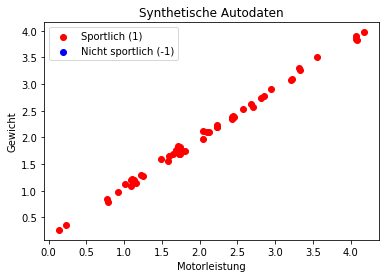

In [34]:
x, y = generate()

plot_data(x,y)


# Aufgabe 3

Evaluieren Sie Ihre Implementierung des Perzeptrons systematisch anhand der
synthetischen Daten und einem Train-Test-Split. Dazu dürfen Sie auch Scipy und Scikit-learn
verwenden. Ihr Programm sollte das bei Aufruf von python blatt1.py ausführen und mit
print den Fehler (Anteil der falsch klassifizierten) ausgeben. In einem Notebook sollte das Ergebnis
nach Ausführen aller Zellen zu sehen sein.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:
def evaluate_perceptron(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    perceptron = Perceptron(learning_rate=0.1, epochs=100)
    perceptron.train(x_train, y_train)

    y_pred = perceptron.infer(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    print(f'Fehlerrate: {error_rate * 100:.2f}%')

x, y = generate()
evaluate_perceptron(x,y)

Fehlerrate: 65.00%


# Aufgabe 4

Evaluieren Sie Ihre Implementierung des Perzeptrons anhand des Iris-Flower-Datasets,
aus dem Sie nur die Spezies ‘setosa’ und ‘versicolor’ auswählen. Dazu dürfen Sie auch Scipy
und Scikit-learn verwenden. Geben Sie mit print den Fehler auf dem gesamten Datensatz nach
Training auf dem gesamten Datensatz aus.
Wenn Sie sich das ganze visualisieren möchten, empfiehlt sich, aus dem Iris-Flower-Datensatz
zwei Attribute auszuwählen. Achtung: es macht einen Unterschied, ob der ganze Datensatz (mit 4
Attributen) zum Training verwendet wird und nur die Visualisierung in 2 Dimensionen stattfindet,
oder ob bereits das Training mit nur 2 Attributen durchgeführt wird. Überlegen Sie sich, warum.

In [42]:
from sklearn.datasets import load_iris

In [60]:
iris = load_iris()
x = iris['data']
y = iris['target']

# setosa_versicolor_mask = (y == 0) | (y == 1)
# x = x[setosa_versicolor_mask]
# y = y[setosa_versicolor_mask]
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [63]:
evaluate_perceptron(x, y)

Fehlerrate: 70.00%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


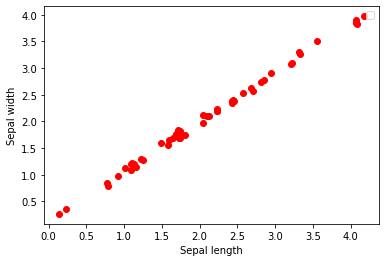

In [95]:
perceptron = Perceptron(learning_rate=0.1, epochs=100)

plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r')
# plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color='b')
# plt.title('Perzeptron-Klassifikation der Iris-Daten')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

## Teile von Aufgabe 2 und 3 wurden mit Hilfe von Chatgpt erstellt.